In [1]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns

In [2]:
checkpoints = r'C:\Users\syedm\Desktop\Electrical (Communication)\8TH SEMESTER 2025\INTRODUCTION TO MACHINE LEARNING LAB\MACHINE LAB WORKS\LAB 13\\E1-cp-{epoch:04d}-loss{val_loss:.2f}.h5'

In [3]:
train_dir = r'C:\Users\syedm\Desktop\Electrical (Communication)\8TH SEMESTER 2025\INTRODUCTION TO MACHINE LEARNING LAB\MACHINE LAB WORKS\LAB 13\computer vision\train'
validation_dir = r'C:\Users\syedm\Desktop\Electrical (Communication)\8TH SEMESTER 2025\INTRODUCTION TO MACHINE LEARNING LAB\MACHINE LAB WORKS\LAB 13C:\'
test_dir = r'C:\Users\syedm\Desktop\Electrical (Communication)\8TH SEMESTER 2025\INTRODUCTION TO MACHINE LEARNING LAB\MACHINE LAB WORKS\LAB 13\computer vision\test'

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 32)       0

In [6]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

C:\Users\musta\anaconda3\envs\myenv\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [7]:
train_datagen = ImageDataGenerator(
                                    rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                                                    train_dir,
                                                    target_size=(64, 64),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
                                                        validation_dir,
                                                        target_size=(64, 64),
                                                        batch_size=32,
                                                        class_mode='categorical')

Found 1600 images belonging to 4 classes.
Found 252 images belonging to 4 classes.


In [8]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(256, 256), batch_size=32,class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(256, 256),batch_size=32,class_mode='categorical')

Found 1600 images belonging to 4 classes.
Found 252 images belonging to 4 classes.


In [9]:
EpochCheckpoint = ModelCheckpoint(checkpoints,
                             monitor="val_loss",
                             save_best_only=True, 
                             verbose=1)
callbacks = [EpochCheckpoint]

In [10]:
model_history = model.fit(train_generator,
                         validation_data =validation_generator,
                         steps_per_epoch=train_generator.n//train_generator.batch_size,
                         validation_steps = validation_generator.n//validation_generator.batch_size,
                         epochs = 5,
                         callbacks = callbacks)

Epoch 1/5
50/50 [==============================] - ETA: 0s - loss: 1.0948 - acc: 0.5431
Epoch 1: val_loss improved from inf to 0.66091, saving model to C:\Users\musta\Desktop\ML lab\Lab 13\E1-cp-0001-loss0.66.h5
50/50 [==============================] - 343s 7s/step - loss: 1.0948 - acc: 0.5431 - val_loss: 0.6609 - val_acc: 0.7634
Epoch 2/5
50/50 [==============================] - ETA: 0s - loss: 0.5738 - acc: 0.7675
Epoch 2: val_loss improved from 0.66091 to 0.45967, saving model to C:\Users\musta\Desktop\ML lab\Lab 13\E1-cp-0002-loss0.46.h5
50/50 [==============================] - 338s 7s/step - loss: 0.5738 - acc: 0.7675 - val_loss: 0.4597 - val_acc: 0.7812
Epoch 3/5
50/50 [==============================] - ETA: 0s - loss: 0.4630 - acc: 0.7862
Epoch 3: val_loss did not improve from 0.45967
50/50 [==============================] - 393s 8s/step - loss: 0.4630 - acc: 0.7862 - val_loss: 0.4598 - val_acc: 0.7545
Epoch 4/5
50/50 [==============================] - ETA: 0s - loss: 0.3915 - a

In [11]:
model_history.history

{'loss': [1.094832420349121,
  0.5738281607627869,
  0.4630091190338135,
  0.3914574384689331,
  0.373363196849823],
 'acc': [0.5431249737739563,
  0.7674999833106995,
  0.7862499952316284,
  0.8262500166893005,
  0.831250011920929],
 'val_loss': [0.6609050631523132,
  0.4596668779850006,
  0.45977479219436646,
  0.40360504388809204,
  0.35143402218818665],
 'val_acc': [0.7633928656578064,
  0.78125,
  0.7544642686843872,
  0.7767857313156128,
  0.8035714030265808]}

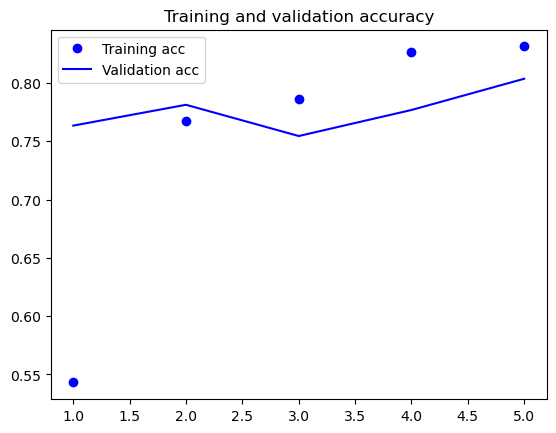

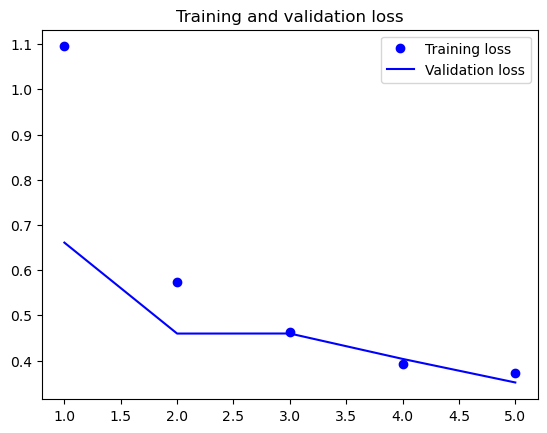

<Figure size 640x480 with 0 Axes>

In [12]:
acc = model_history.history['acc']
val_acc = model_history.history['val_acc']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
plt.savefig(r'C:\Users\syedm\Desktop\Electrical (Communication)\8TH SEMESTER 2025\INTRODUCTION TO MACHINE LEARNING LAB\MACHINE LAB WORKS\LAB 13\computer vision\model_Accuracy.png')

Found 200 images belonging to 4 classes.
7/7 [==============================] - 17s 2s/step


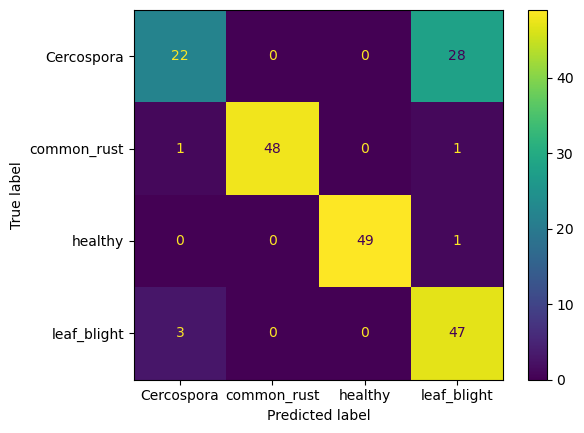

In [14]:
model = load_model(r'C:\Users\syedm\Desktop\Electrical (Communication)\8TH SEMESTER 2025\INTRODUCTION TO MACHINE LEARNING LAB\MACHINE LAB WORKS\LAB 13\E1-cp-0005-loss0.35.h5')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(256, 256), batch_size=32, shuffle=False, class_mode='categorical')
label=test_generator.labels
preds=model.predict(test_generator)
pred = np.argmax(preds, axis = 1)
cm = confusion_matrix(label, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=['Cercospora', 'common_rust','healthy', 'leaf_blight'])
disp.plot()
plt.show()


In [15]:
print(classification_report(label, pred, target_names=['Cercospora', 'common_rust','healthy', 'leaf_blight']))

              precision    recall  f1-score   support

  Cercospora       0.85      0.44      0.58        50
 common_rust       1.00      0.96      0.98        50
     healthy       1.00      0.98      0.99        50
 leaf_blight       0.61      0.94      0.74        50

    accuracy                           0.83       200
   macro avg       0.86      0.83      0.82       200
weighted avg       0.86      0.83      0.82       200

